In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='ticks', context='talk')
%matplotlib inline

In [2]:
data0=pd.read_csv(r'M:/critical/imputed.csv')

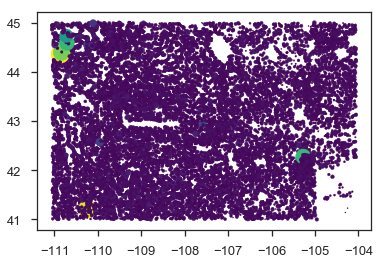

In [3]:
plt.scatter(data0['longitude'], data0['latitude'], c=data0['w_ppm'], cmap='viridis', s=data0['w_ppm'])

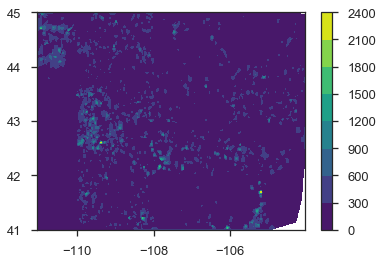

In [4]:
from scipy.interpolate import griddata
import matplotlib
xvalues=np.arange(np.min(data0['longitude']),np.max(data0['longitude'].values),0.01)
yvalues=np.arange(np.min(data0['latitude']),np.max(data0['latitude'].values),0.001)

Xi, Yi=np.meshgrid(xvalues,yvalues)
points=list(zip(data0['longitude'], data0['latitude']))
values=data0['zr_ppm']

grid_z2 = griddata(points, values, (Xi, Yi), method='linear')
plt.contourf(Xi, Yi, grid_z2, cmap='viridis')
plt.colorbar()


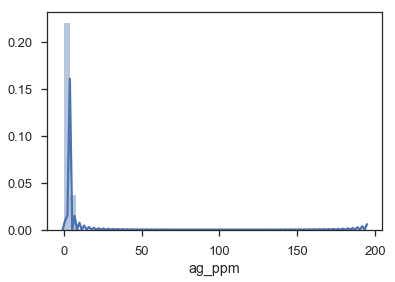

In [7]:
sns.distplot(data0['ag_ppm'])

In [5]:
nure=pd.read_csv(r'M:/critical/trimmed.csv')
dataColumns=['u_dn_ppm', 'u_fl_ppm', 
       'ag_ppm', 'al_pct', 'as_ppm', 'au_ppm', 'b_ppm', 'ba_ppm', 'be_ppm',
       'bi_ppm', 'ca_pct', 'cd_ppm', 'ce_ppm', 'cl_ppm',
       'co_ppm', 'cr_ppm', 'cs_ppm', 'cu_ppm', 'dy_ppm', 'eu_ppm',
       'fe_pct', 'hf_ppm', 'k_pct', 'la_ppm', 'li_ppm', 'lu_ppm',
       'mg_pct', 'mn_ppm', 'mo_ppm', 'na_pct', 'nb_ppm', 'ni_ppm', 'p_ppm',
       'pb_ppm', 'rb_ppm', 'sb_ppm', 'sc_ppm', 'se_ppm',
       'sm_ppm', 'sn_ppm', 'sr_ppm', 'ta_ppm', 'tb_ppm', 'th_ppm',
       'ti_ppm', 'v_ppm', 'w_ppm', 'y_ppm', 'yb_ppm', 'zn_ppm', 'zr_ppm']
for j in range(len(dataColumns)):
    news=[]
    for i in range(len(nure[dataColumns[j]])):
        if nure[dataColumns[j]][i]<0:
            news.append(np.random.randint(0,np.ceil(abs(nure[dataColumns[j]][i]))))
        else:
            news.append(nure[dataColumns[j]][i])
    nure[dataColumns[j]]=news

            
filled=nure.fillna(0)


C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (19,20,28,29,31,35,46,47,48,66,68,79,145) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


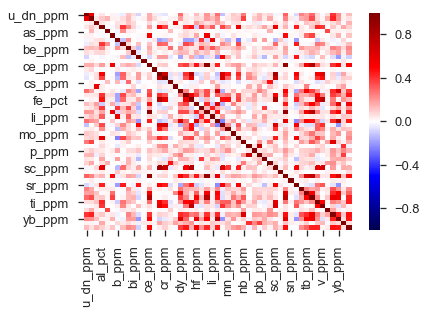

In [6]:
sns.heatmap(data0[dataColumns].corr(), cmap='seismic', vmin=-1, vmax=1)

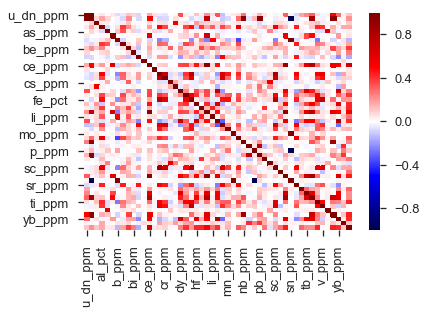

In [7]:
sns.heatmap(nure[dataColumns].corr(), vmin=-1, vmax=1, cmap='seismic')

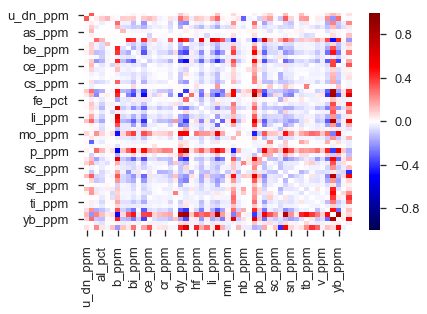

In [8]:
sns.heatmap(data0[dataColumns].corr()-nure[dataColumns].fillna(0).corr(),vmin=-1, vmax=1, cmap='seismic')

In [9]:
len(data0.drop(nure[dataColumns].iloc[0:,1].dropna().index).iloc[0:,1])

17621

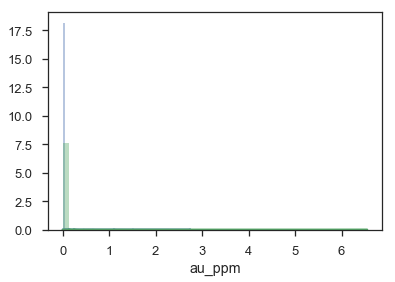

In [132]:
columnS=5
imputedData=data0[dataColumns].iloc[0:,columnS].drop(nure[dataColumns].iloc[0:,columnS].dropna().index)
originalData=nure[dataColumns].iloc[0:,columnS].dropna()
sns.distplot(imputedData)
sns.distplot(originalData)

In [11]:
from scipy import stats
p_values=[]
for i in range(len(dataColumns)):
    imputedData=data0[dataColumns].iloc[0:,i].drop(nure[dataColumns].iloc[0:,i].dropna().index)
    originalData=nure[dataColumns].iloc[0:,i].dropna()
    p_values.append(stats.ks_2samp(imputedData, originalData)[1])


C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:4750: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:4756: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid val

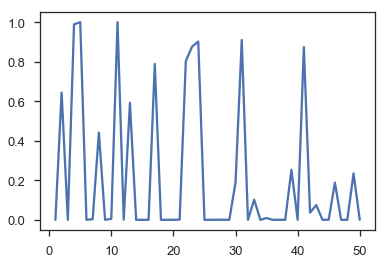

In [12]:
plt.plot(p_values)

In [13]:
p_values=[]

for j in range(len(dataColumns)):
    columnS=j
    imputedData=pd.DataFrame()
    for i in range(40):
        it1=pd.read_csv(r'M:\critical\imputations\data'+str(i)+'.csv')
        imputedData[str(i)]=it1[dataColumns].iloc[0:,columnS].drop(nure[dataColumns].iloc[0:,columnS].dropna().index).values
    originalData=nure[dataColumns].iloc[0:,columnS].dropna()
    p_values.append(stats.ks_2samp(imputedData.values.flatten(), originalData)[1])


C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:4750: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / (1.0*n1)
C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:4756: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid val

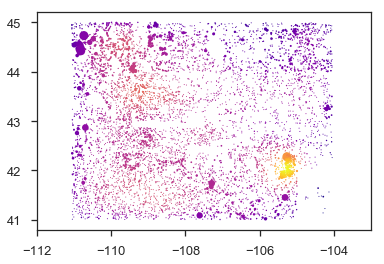

In [37]:
#plt.scatter(nure['longitude'], nure['latitude'], s=nure['co_ppm'])
from scipy.stats import gaussian_kde
'''
smooths the latitude and longitude with a gaussian kernel that makes a heat map
'''


In [187]:
for i in range(len(dataColumns)):
    originalData=nure[dataColumns].iloc[0:,i].dropna()
    plt.scatter(nure['longitude'], nure['latitude'], c=nure[dataColumns[i]], s=3, cmap='seismic')
    plt.title('Original Data '+str(dataColumns[i]))
    plt.colorbar()
    plt.savefig('M:/imputation maps/Original Data '+str(dataColumns[i])+'.jpg')
    plt.clf()



In [188]:
for i in range(len(dataColumns)):
    plt.scatter(data0['longitude'], data0['latitude'], c=data0[dataColumns[i]], s=3, cmap='seismic')
    plt.title('Imputed Data '+str(dataColumns[i]))
    plt.colorbar()
    plt.savefig('M:/imputation maps/Imputed Data '+str(dataColumns[i])+'.jpg')
    plt.clf()


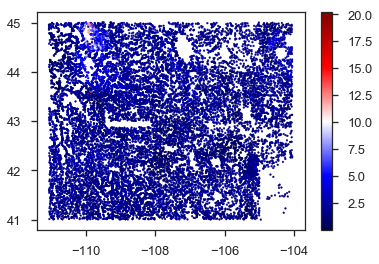

In [183]:
plt.scatter(nure['longitude'], nure['latitude'], c=np.std(nure[dataColumns[0]])/nure[dataColumns[0]], s=3, cmap='seismic')
plt.colorbar()


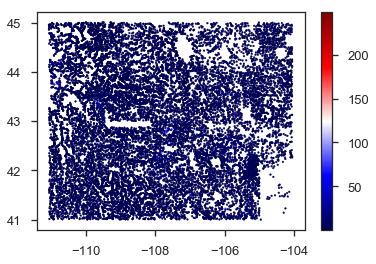

In [182]:
plt.scatter(nure['longitude'], nure['latitude'], c=nure[dataColumns[0]], s=3, cmap='seismic')
plt.colorbar()


In [306]:
nure=pd.read_csv(r'M:/critical/trimmed.csv')
dataColumns=['u_dn_ppm', 'u_fl_ppm', 
       'ag_ppm', 'al_pct', 'as_ppm', 'au_ppm', 'b_ppm', 'ba_ppm', 'be_ppm',
       'bi_ppm', 'ca_pct', 'cd_ppm', 'ce_ppm', 'cl_ppm',
       'co_ppm', 'cr_ppm', 'cs_ppm', 'cu_ppm', 'dy_ppm', 'eu_ppm',
       'fe_pct', 'hf_ppm', 'k_pct', 'la_ppm', 'li_ppm', 'lu_ppm',
       'mg_pct', 'mn_ppm', 'mo_ppm', 'na_pct', 'nb_ppm', 'ni_ppm', 'p_ppm',
       'pb_ppm', 'rb_ppm', 'sb_ppm', 'sc_ppm', 'se_ppm',
       'sm_ppm', 'sn_ppm', 'sr_ppm', 'ta_ppm', 'tb_ppm', 'th_ppm',
       'ti_ppm', 'v_ppm', 'w_ppm', 'y_ppm', 'yb_ppm', 'zn_ppm', 'zr_ppm']
for j in range(len(dataColumns)):
    news=[]
    for i in range(len(nure[dataColumns[j]])):
        if nure[dataColumns[j]][i]<0:
            news.append(np.random.randint(0,np.ceil(abs(nure[dataColumns[j]][i]))))
        else:
            news.append(nure[dataColumns[j]][i])
    nure[dataColumns[j]]=news

disposable=nure

C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (19,20,28,29,31,35,46,47,48,66,68,79,145) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [299]:
validationIndex=pd.DataFrame()
for i in range(len(dataColumns)):
    validationIndex=pd.DataFrame()
    disposable=nure
    tester=np.int(len(disposable[disposable[dataColumns[i]].notnull()==True].index)*.01)
    rands=np.random.choice(disposable[disposable[dataColumns[i]].notnull()==True].index,tester)
    disposable.at[rands, dataColumns[i]]=np.nan
    disposable.to_csv('M:/critical/validation sets/'+str(dataColumns[i])+'.csv')
    validationIndex[dataColumns[i]]=rands
    validationIndex.to_csv('M:/critical/validation sets/validation_index '+str(dataColumns[i])+'.csv')


In [ ]:
nure=pd.read_csv(r'M:/critical/trimmed.csv')
dataColumns=['u_dn_ppm', 'u_fl_ppm', 
       'ag_ppm', 'al_pct', 'as_ppm', 'au_ppm', 'b_ppm', 'ba_ppm', 'be_ppm',
       'bi_ppm', 'ca_pct', 'cd_ppm', 'ce_ppm', 'cl_ppm',
       'co_ppm', 'cr_ppm', 'cs_ppm', 'cu_ppm', 'dy_ppm', 'eu_ppm',
       'fe_pct', 'hf_ppm', 'k_pct', 'la_ppm', 'li_ppm', 'lu_ppm',
       'mg_pct', 'mn_ppm', 'mo_ppm', 'na_pct', 'nb_ppm', 'ni_ppm', 'p_ppm',
       'pb_ppm', 'rb_ppm', 'sb_ppm', 'sc_ppm', 'se_ppm',
       'sm_ppm', 'sn_ppm', 'sr_ppm', 'ta_ppm', 'tb_ppm', 'th_ppm',
       'ti_ppm', 'v_ppm', 'w_ppm', 'y_ppm', 'yb_ppm', 'zn_ppm', 'zr_ppm']
for j in range(len(dataColumns)):
    news=[]
    for i in range(len(nure[dataColumns[j]])):
        if nure[dataColumns[j]][i]<0:
            news.append(np.random.randint(0,np.ceil(abs(nure[dataColumns[j]][i]))))
        else:
            news.append(nure[dataColumns[j]][i])
    nure[dataColumns[j]]=news

In [287]:
#read in generated data
#read in original data, this is the nure variable
#read in validation index
#use validation index to get generated data and add to new df
#use validation index to get original data and add to new df
imputedValues=[]
correctValues=[]
for i in range(len(dataColumns)):
    generated=pd.read_csv('M:/critical/validation sets/'+str(dataColumns[i])+'_generated.csv')
    indicies=pd.read_csv('M:/critical/validation sets/validation_index '+str(dataColumns[i])+'.csv')
    imputedValues.append(generated.loc[indicies.iloc[0:,1].values][dataColumns[i]])
    correctValues.append(nure.loc[indicies.iloc[0:,1].values][dataColumns[i]].values)

C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (20,21,29,30,32,36,47,48,49,67,69,80,146) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [314]:
imputedValues

NameError: name 'imputedValues' is not defined

In [315]:
len(dataColumns)

51